In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

here = os.getcwd()
main = here.split("\\")
home = "\\".join(main[:-2])
home

'c:\\Users\\Tan Duong\\OneDrive - vnu.edu.vn\\UET\\MEMS\\CountCell\\featuresBasedForCountCellSig'

In [3]:
# Load the dataset
data_positive = pd.read_csv(os.path.join(home,'truePositive.csv'))
data_negative = pd.read_csv(os.path.join(home,'falsePositive.csv'))

X = pd.concat([data_positive,data_negative])
y = np.array([1]*len(data_positive) + [0] * len(data_negative))
columns = X.columns
len(X)

11492

In [5]:
from sklearn.ensemble import IsolationForest, RandomForestClassifier
iso = IsolationForest(contamination=0.1, random_state=15)
yhat = iso.fit_predict(X)
mask = yhat != -1
X, y = X[mask], y[mask]
len(X)

9307

In [6]:
# one-class svm for imbalanced binary classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler


# define outlier detection model
model_scale = OneClassSVM(gamma='scale', nu=0.01)


In [7]:
def scale_features(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

## 1, Contains both negative and positive in training dataset 

In [ ]:
# fit on majority class
trainX = trainX[trainy==0]
model.fit(trainX)
# detect outliers in the test set
yhat = model.predict(testX)
# mark inliers 1, outliers -1
testy[testy == 1] = -1
testy[testy == 0] = 1
# calculate score
score = f1_score(testy, yhat, pos_label=-1)
print('F1 Score: %.3f' % score)

## 2, Contains only positive signal in training dataset

Puring

In [9]:
X_pure = X.copy()
X_pure['label'] = y


X_positive = X_pure[X_pure['label'] != 0]
X_negative = X_pure[X_pure['label'] == 0]

y_positive = X_positive['label']
X_positive = X_positive.drop(columns=['label'])

y_negative = X_negative['label']
X_negative = X_negative.drop(columns=['label'])

# split into train/test sets
pure_trainX, pure_testX, pure_trainy, pure_testy = train_test_split(X_positive, y_positive, test_size=0.2, random_state=2)

# fit on majority class (normal samples)
pure_trainX = scale_features(pure_trainX)
model_scale.fit(pure_trainX)
# detect outliers in the test set


OneClassSVM(nu=0.01)

In [11]:
numTestNegativeSample = min(len(pure_testX), len(X_negative))

entropy_list = np.random.choice(np.arange(len(X_negative)),numTestNegativeSample,replace=False)
additionNegativeData = X_negative.iloc[entropy_list]
additionNegativeLabel = y_negative.to_numpy()[entropy_list]

testBothNegPosData = pd.concat([pure_testX,additionNegativeData])
testBothNegPosLabel = np.concatenate((pure_testy, additionNegativeLabel-1))


In [12]:
yhat = model_scale.predict(scale_features(testBothNegPosData))

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [14]:
set(testBothNegPosLabel)

{-1, 1}

Accuracy: 0.576
Precision: 0.542
Recall: 0.990
F1 Score: 0.700


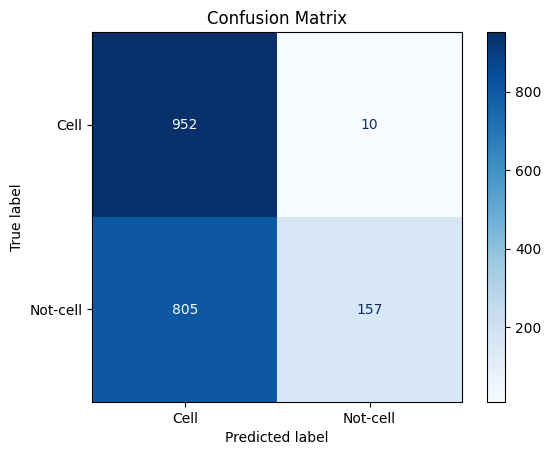

In [15]:

def validation(testy, yhat):
    # Calculate metrics
    accuracy = accuracy_score(testy, yhat)
    precision = precision_score(testy, yhat)
    recall = recall_score(testy, yhat)
    f1 = f1_score(testy, yhat)

    # Print metrics
    print('Accuracy: %.3f' % accuracy)
    print('Precision: %.3f' % precision)
    print('Recall: %.3f' % recall)
    print('F1 Score: %.3f' % f1)

    # Compute confusion matrix
    cm = confusion_matrix(testy, yhat, labels=[1, -1])

    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cell', 'Not-cell'])
    disp.plot(cmap=plt.cm.Blues)

    # Show the plot
    plt.title('Confusion Matrix')
    # plt.savefig('hello.png',dpi= 200)
    plt.show()
validation(testBothNegPosLabel,yhat)

## 3, Train with SVDD `pyod`

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from pyod.models.ocsvm import OCSVM

# Define SVDD model with RBF kernel
model = OCSVM(kernel='rbf', gamma='scale', nu=0.01)

# Fit on the filtered training data (inliers only)
model.fit(pure_trainX)

# Detect outliers in the test set
yhat = model.predict(testBothNegPosData)

validation(testBothNegPosLabel,yhat)

c:\Users\Tan Duong\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but OneClassSVM was fitted without feature names
  warnings.warn(


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

### Visualize on T-SNE to show correlation 

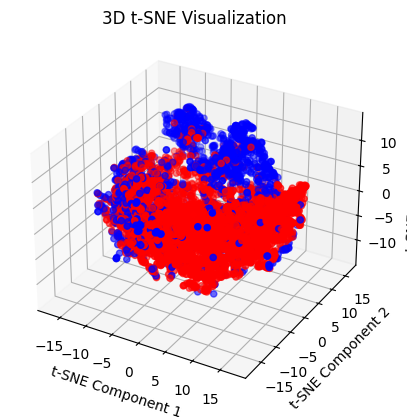

In [11]:
# Import necessary libraries
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Apply t-SNE
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the 3D t-SNE result
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Color map based on labels
colors = ['r' if label == 1 else 'b' for label in y]

ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=colors, marker='o')
ax.set_title('3D t-SNE Visualization')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')

plt.show()


Counter({0: 9990, 1: 10})


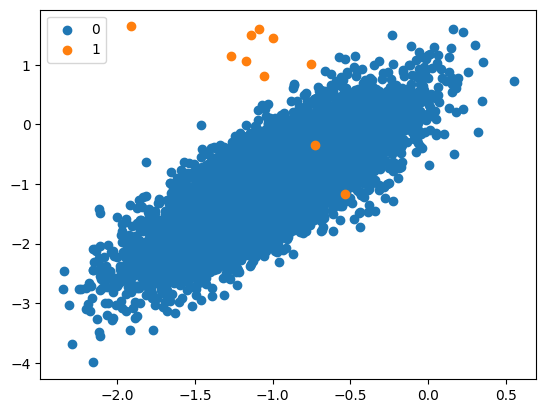

In [12]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.999], flip_y=0, random_state=4)
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [38]:
# one-class svm for imbalanced binary classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.svm import OneClassSVM
# generate dataset
# X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
# 	n_clusters_per_class=1, weights=[0.999], flip_y=0, random_state=4)
# # split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)
# define outlier detection model
model = OneClassSVM(gamma='scale', nu=0.01)
# fit on majority class
trainX = trainX[trainy==0]
model.fit(trainX)
# detect outliers in the test set
yhat = model.predict(testX)
# mark inliers 1, outliers -1
testy[testy == 1] = -1
testy[testy == 0] = 1
# calculate score
score = f1_score(testy, yhat, pos_label=-1)
print('F1 Score: %.3f' % score)

F1 Score: 0.138


In [43]:
f1_score(testy, yhat, pos_label=-1)

0.13793103448275862

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(testy,yhat)

0.9875

Confusion matrix, without normalization


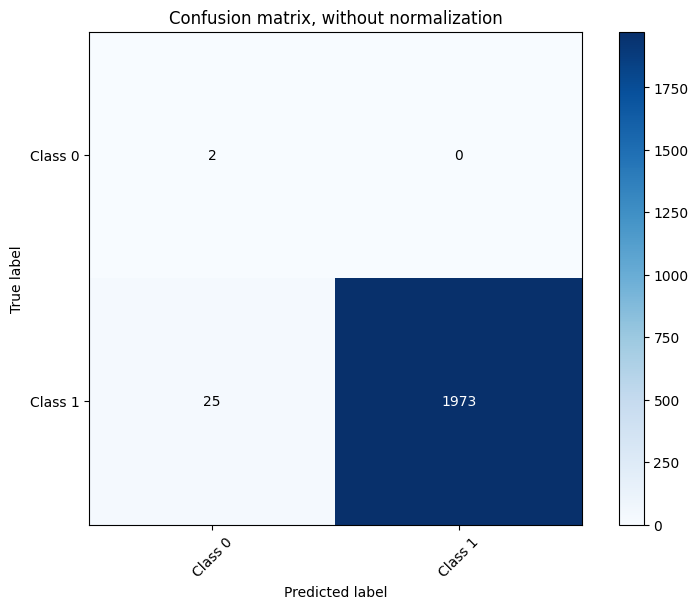

Precision: 1.0
Recall: 0.9874874874874875
F1 Score: 0.13793103448275862


In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Function to compute precision, recall, and F1 score
def compute_metrics(y_true, y_pred):
    
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, pos_label=-1)
    return precision, recall, f1


# Define class names
classes = ['Class 0', 'Class 1']

# Plot confusion matrix
plot_confusion_matrix(testy,yhat, classes=classes)

# Compute precision, recall, and F1 score
precision, recall, f1 = compute_metrics(testy,yhat)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


In [52]:
true_example = [1,1,1,1,1,0,0,0,0,0]
pred_example = [1,1,0,1,1,0,0,1,1,0]
precision_score(true_example,pred_example),recall_score(true_example, pred_example)

(0.6666666666666666, 0.8)